# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
#!pip install citipy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
import api_keys

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(cities)

# Show Record Count
city_data_df.count()

0    587
dtype: int64

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city 
    city_url = f"{url}data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        
        #print(f"Status Code: {response.status_code}")
        city_weather = response.json()
        
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get('coord', {}).get('lat')
        city_lng = city_weather.get('coord', {}).get('lon')
        city_max_temp = city_weather.get('main', {}).get('temp_max')
        city_humidity = city_weather.get('main', {}).get('humidity')
        city_clouds = city_weather.get('clouds', {}).get('all')
        city_wind = city_weather.get('wind', {}).get('speed')
        city_country = city_weather.get('sys', {}).get('country')
        city_date = city_weather.get('dt')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | pont rouge
Processing Record 6 of Set 1 | susuman
Processing Record 7 of Set 1 | minas de marcona
Processing Record 8 of Set 1 | harper
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | morada nova
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | antsiranana
Processing Record 16 of Set 1 | ghat
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | cargados carajos
Processing Record 19 of Set 1 | chirilagua
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | west island
Processing 

Processing Record 46 of Set 4 | akureyri
Processing Record 47 of Set 4 | tadine
Processing Record 48 of Set 4 | aqadyr
Processing Record 49 of Set 4 | hawaiian paradise park
Processing Record 0 of Set 5 | wynyard
Processing Record 1 of Set 5 | pustoshka
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | vrede
Processing Record 4 of Set 5 | remire-montjoly
Processing Record 5 of Set 5 | tevriz
Processing Record 6 of Set 5 | la rioja
Processing Record 7 of Set 5 | moussoro
Processing Record 8 of Set 5 | arilje
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 of Set 5 | castlegar
Processing Record 11 of Set 5 | keetmanshoop
Processing Record 12 of Set 5 | jalai nur
Processing Record 13 of Set 5 | fort bragg
Processing Record 14 of Set 5 | kununurra
Processing Record 15 of Set 5 | rio bueno
Processing Record 16 of Set 5 | maxixe
Processing Record 17 of Set 5 | flying fish cove
Processing Record 18 of Set 5 | bria
Processing Record 19 of Set 5 | alo
Processing

Processing Record 44 of Set 8 | marsa alam
Processing Record 45 of Set 8 | savantvadi
Processing Record 46 of Set 8 | barnoldswick
Processing Record 47 of Set 8 | totness
Processing Record 48 of Set 8 | greymouth
Processing Record 49 of Set 8 | caucaia
Processing Record 0 of Set 9 | nimbahera
Processing Record 1 of Set 9 | myitkyina
Processing Record 2 of Set 9 | al khums
Processing Record 3 of Set 9 | touros
Processing Record 4 of Set 9 | klaksvik
Processing Record 5 of Set 9 | tarko-sale
Processing Record 6 of Set 9 | lautoka
Processing Record 7 of Set 9 | hilo
Processing Record 8 of Set 9 | westport
Processing Record 9 of Set 9 | alice springs
Processing Record 10 of Set 9 | pisco
Processing Record 11 of Set 9 | namibe
Processing Record 12 of Set 9 | fenoarivo be
Processing Record 13 of Set 9 | saipan
Processing Record 14 of Set 9 | badamdar
Processing Record 15 of Set 9 | mayen abun
Processing Record 16 of Set 9 | villa gesell
Processing Record 17 of Set 9 | peniche
Processing Reco

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df['Max Temp'].count()

550

In [20]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,65.07,61.0,4.0,6.42,NZ,1.706485e+09
1,adamstown,-25.0660,-130.1015,76.21,76.0,100.0,9.91,PN,1.706485e+09
2,albany,42.6001,-73.9662,34.36,85.0,100.0,1.01,US,1.706484e+09
3,isafjordur,66.0755,-23.1240,21.61,90.0,100.0,4.00,IS,1.706485e+09
4,pont rouge,48.8833,-72.0825,30.49,96.0,98.0,3.53,CA,1.706485e+09


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,65.07,61.0,4.0,6.42,NZ,1.706485e+09
1,adamstown,-25.0660,-130.1015,76.21,76.0,100.0,9.91,PN,1.706485e+09
2,albany,42.6001,-73.9662,34.36,85.0,100.0,1.01,US,1.706484e+09
3,isafjordur,66.0755,-23.1240,21.61,90.0,100.0,4.00,IS,1.706485e+09
4,pont rouge,48.8833,-72.0825,30.49,96.0,98.0,3.53,CA,1.706485e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

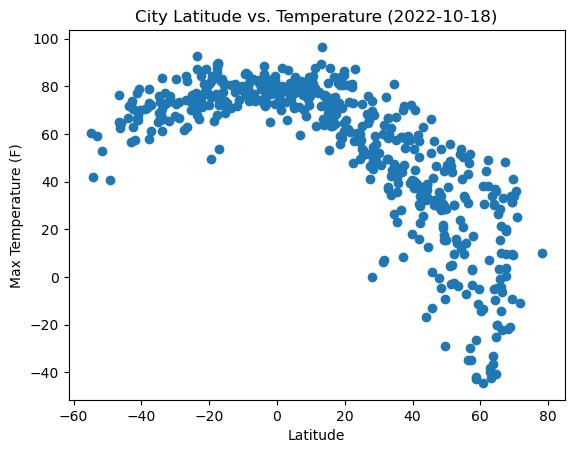

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

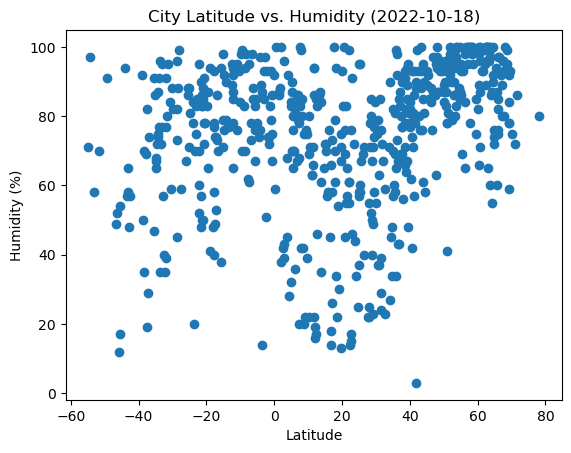

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

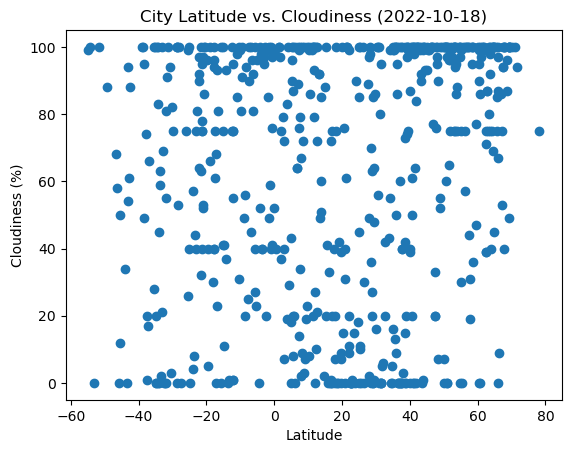

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

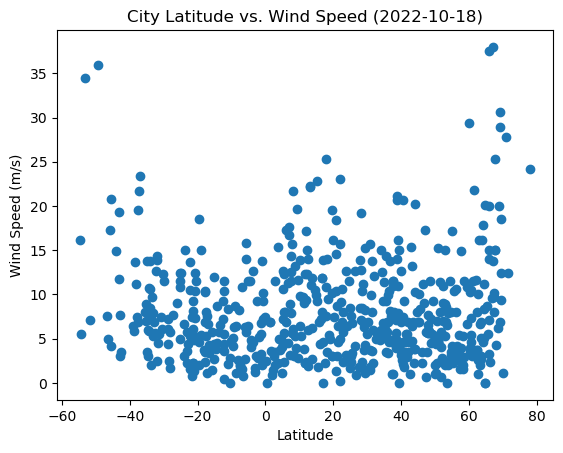

In [70]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots --use linregress (CHAGPT 2024, personal communication, January 26, 2024)

def linear_regression_plot(df, x_col, y_col, x_label, y_label, title):
    
    """
    Create a linear regression plot.

    Parameters:
    - df: Pandas DataFrame.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the x-axis.
    - x_label: str, label for the x-axis.
    - y_label: str, label for the y-axis.
    - title: str, title of the plot.
    """
      
    #linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])
    
    #print slope, intercept, rvalue, standard error
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-value: {rvalue}")
    print(f"P-value: {pvalue}")
    print(f"Standard Error: {stderr}")
    
    #scatter plot
    plt.scatter(df[x_col], df[y_col], label='Data Points')                                                   
                                                          
    #plot linear regression line
    regression_line = slope * df[x_col] + intercept
    plt.plot(df[x_col], regression_line, color='red', label='Linear Regression')
    
    #labels, scatter plot title, legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    #print scatter plot
    plt.show()

#linear_regression_plot(city_data_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 'Linear Regression: Latitude vs. Temperature')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,34.36,85.0,100.0,1.01,US,1.706484e+09
3,isafjordur,66.0755,-23.1240,21.61,90.0,100.0,4.00,IS,1.706485e+09
4,pont rouge,48.8833,-72.0825,30.49,96.0,98.0,3.53,CA,1.706485e+09
5,susuman,62.7833,148.1667,-40.02,99.0,74.0,1.01,RU,1.706485e+09
7,harper,4.3750,-7.7169,79.70,84.0,4.0,6.58,LR,1.706485e+09


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,65.07,61.0,4.0,6.42,NZ,1.706485e+09
1,adamstown,-25.0660,-130.1015,76.21,76.0,100.0,9.91,PN,1.706485e+09
6,minas de marcona,-15.2119,-75.1103,68.79,71.0,7.0,11.34,PE,1.706485e+09
8,port-aux-francais,-49.3500,70.2167,40.87,66.0,92.0,32.35,TF,1.706484e+09
10,dunedin,-45.8742,170.5036,64.60,63.0,4.0,6.33,NZ,1.706485e+09


###  Temperature vs. Latitude Linear Regression Plot

Slope: -1.2754530561886344
Intercept: 90.03622684307103
R-value: -0.8171464984547407
P-value: 3.1775003301731074e-92
Standard Error: 0.04633834205136713


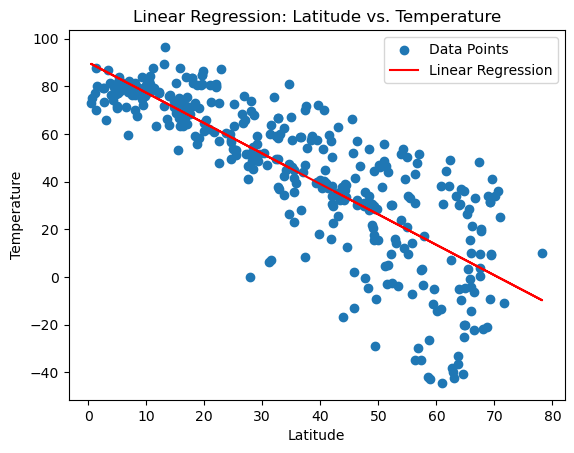

In [18]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 
'Linear Regression: Latitude vs. Temperature')
plt.show()

Slope: 0.34618607914879934
Intercept: 81.91711124210032
R-value: 0.5717683687095024
P-value: 3.138613916892052e-16
Standard Error: 0.03821024003266467


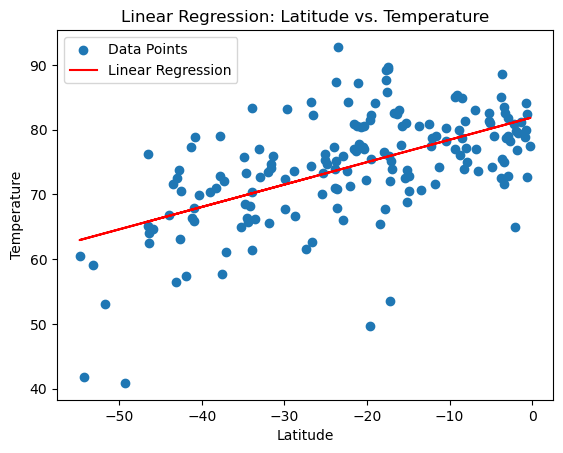

In [19]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 
'Linear Regression: Latitude vs. Temperature')
plt.show()

**Discussion about the linear relationship:** 
There is a positive correlation between latitude and temperature. The R value being over 50% (0.57) suggests that is a positive correlation. As the latitidue increases so does temperature.

### Humidity vs. Latitude Linear Regression Plot

Slope: 0.5095230503512295
Intercept: 55.68651817823985
R-value: 0.4549612643971813
Standard Error: 0.04980312876753189


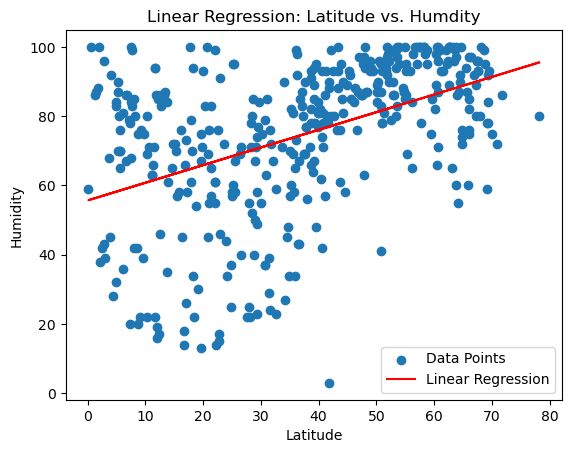

In [53]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Humidity', 'Latitude', 'Humidity', 'Linear Regression: Latitude vs. Humdity')

Slope: 0.4433703262215067
Intercept: 83.58024196811662
R-value: 0.3131284195444956
Standard Error: 0.10194381628725348


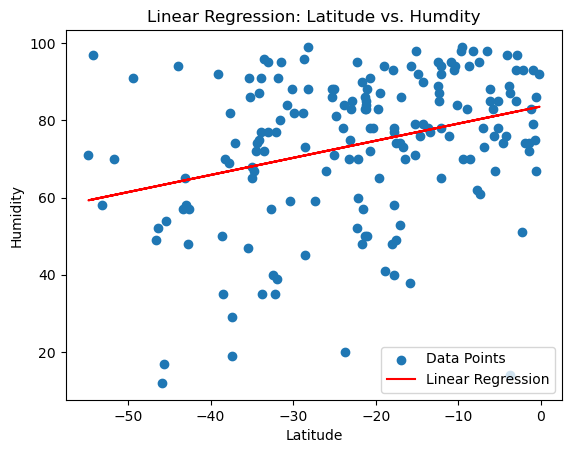

In [54]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Humidity', 'Latitude', 'Humidity', 'Linear Regression: Latitude vs. Humdity')

**Discussion about the linear relationship:** 

The slope is postive and therefore can suggest a positive correlation between latitude and humidity. In other words, an increase in latitude results in an increase in humidity. The R-value being low indicates that the correlation between Latitude and humidity is weak.

### Cloudiness vs. Latitude Linear Regression Plot

Slope: 0.5733654429305443
Intercept: 41.79620550861561
R-value: 0.29032747983090307
Standard Error: 0.09437351943294366


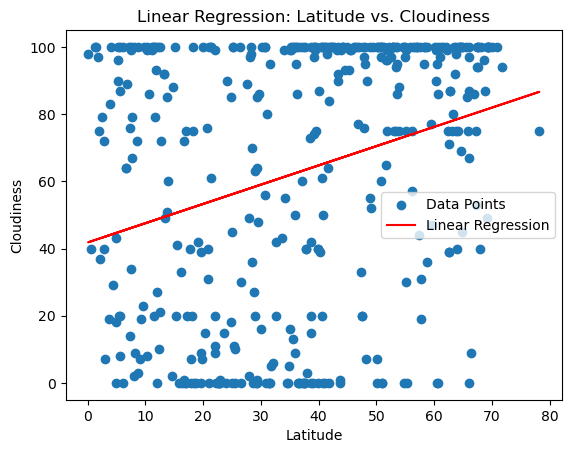

In [55]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Linear Regression: Latitude vs. Cloudiness')

Slope: 0.34238258128722904
Intercept: 68.92653156417828
R-value: 0.12898567189374494
Standard Error: 0.1995503216465938


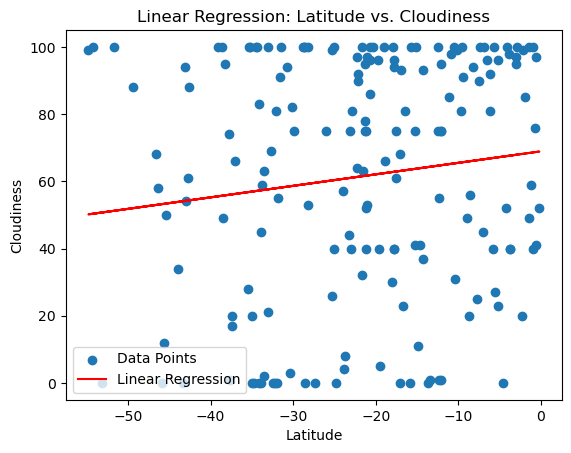

In [56]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Linear Regression: Latitude vs. Cloudiness')

**Discussion about the linear relationship:** 

While the slope here indicates a positive correlation between Latitude and cloudiness, the R-value weakens that correlation. Only 12% of the change in cloudiness can be explained by a change in the Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Slope: 0.019969078035625507
Intercept: 7.325469988052325
R-value: 0.0657550233001368
Standard Error: 0.015132684293636796


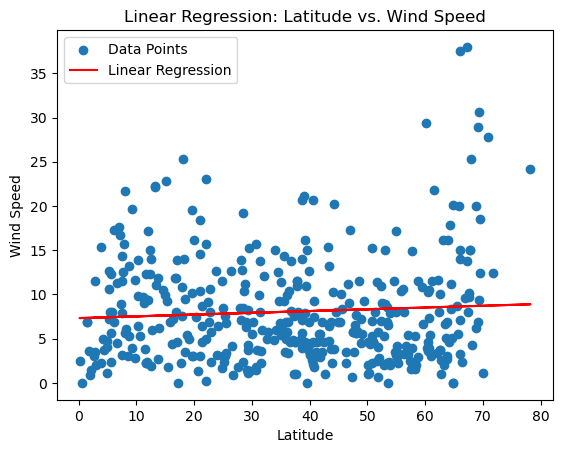

In [57]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Linear Regression: Latitude vs. Wind Speed')

Slope: -0.1544894993522663
Intercept: 4.227338513998067
R-value: -0.3804097413508633
Standard Error: 0.028472723471199914


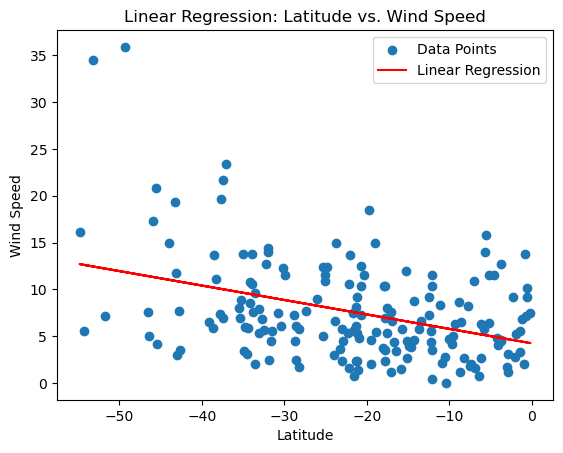

In [58]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Linear Regression: Latitude vs. Wind Speed')


**Discussion about the linear relationship:** 

This suggests a negative correlation between wind and Latitude. The slope suggests that as latitude increases, wind speed decreases. The R-value as well indicates a negative correlation & at -0.38 it does not indicate a strong correlation between latitude and wind speed.